In [2]:
# import librareis
import numpy as np
import cv2
import os
import time
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn import svm
from skimage import data, exposure
from sklearn.model_selection import train_test_split
from skimage import io, color
from skimage.feature import local_binary_pattern
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

**ror: Extension of default pattern which is grayscale invariant and rotation invariant.**

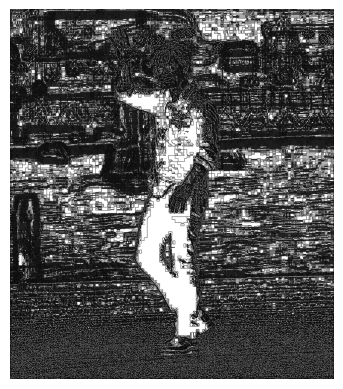

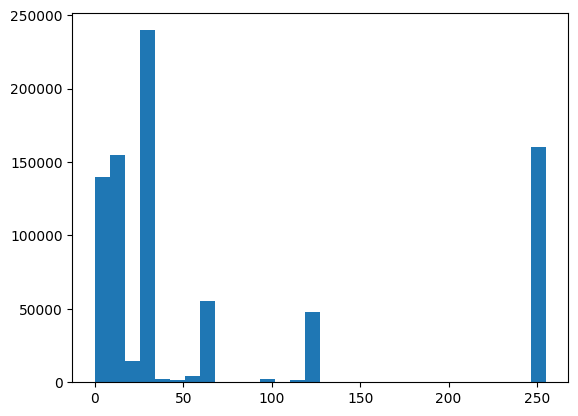

In [9]:
# load image
img = cv2.imread('image.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply LBP
lbp_image=local_binary_pattern(img, 8, 1, method='ror')

# show result
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()

# plot histogram of LBPs
plt.hist(lbp_image.ravel(), bins=30)
plt.show()

 **Default:Original local binary pattern which is grayscale invariant but not rotation invariant.**

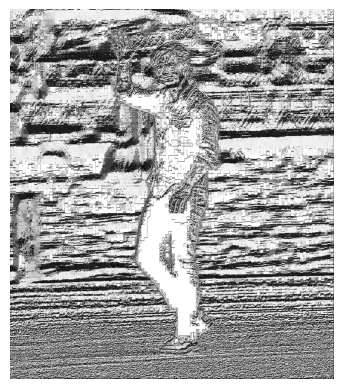

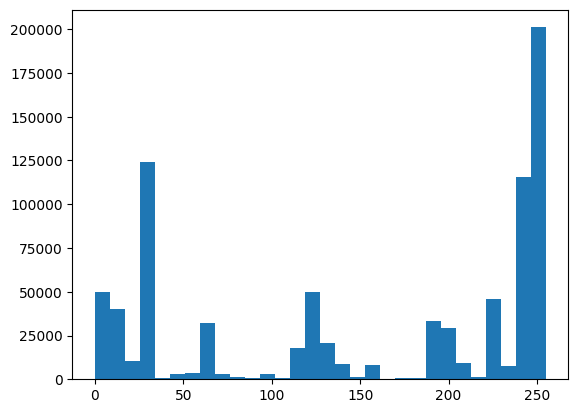

In [10]:
# load image
img = cv2.imread('image.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply LBP
lbp_image=local_binary_pattern(img, 8, 1, method='default')

# show result
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()

# plot histogram of LBPs
plt.hist(lbp_image.ravel(), bins=30)
plt.show()

**Uniform: pattern which is grayscale invariant and rotation invariant, offering finer quantization of the angular space**

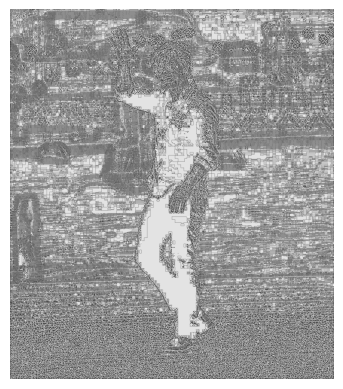

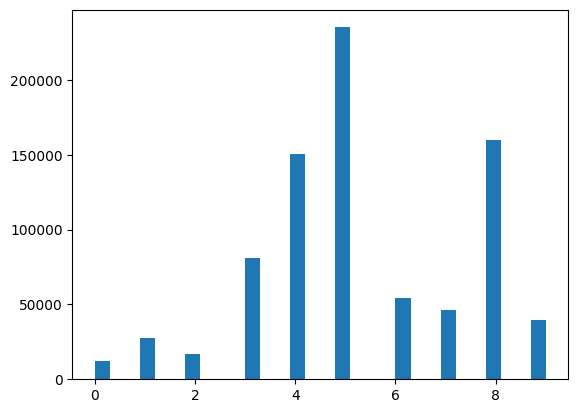

In [11]:
# load image
img = cv2.imread('image.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply LBP
lbp_image=local_binary_pattern(img, 8, 1, method='uniform')

# show result
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()

# plot histogram of LBPs
plt.hist(lbp_image.ravel(), bins=30)
plt.show()

**nri_uniform:Variant of uniform pattern which is grayscale invariant but not rotation invariant.**

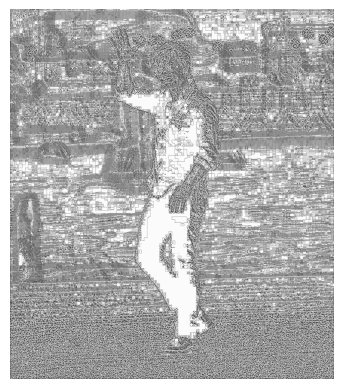

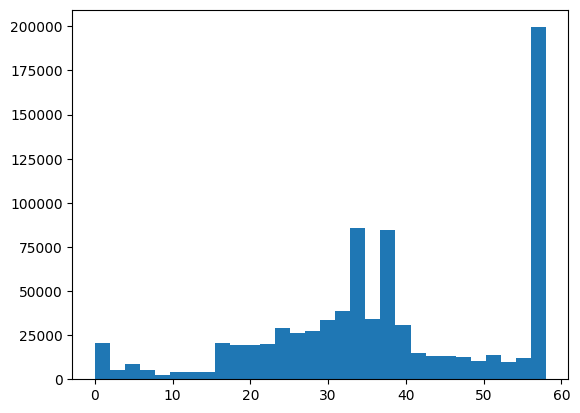

In [12]:
# load image
img = cv2.imread('image.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply LBP
lbp_image=local_binary_pattern(img, 8, 1, method='nri_uniform')

# show result
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()

# plot histogram of LBPs
plt.hist(lbp_image.ravel(), bins=30)
plt.show()

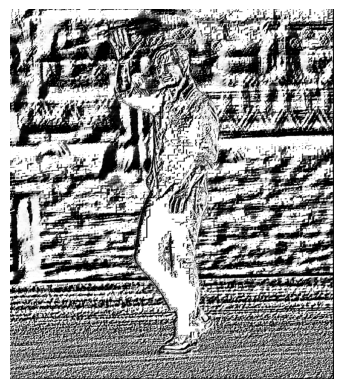

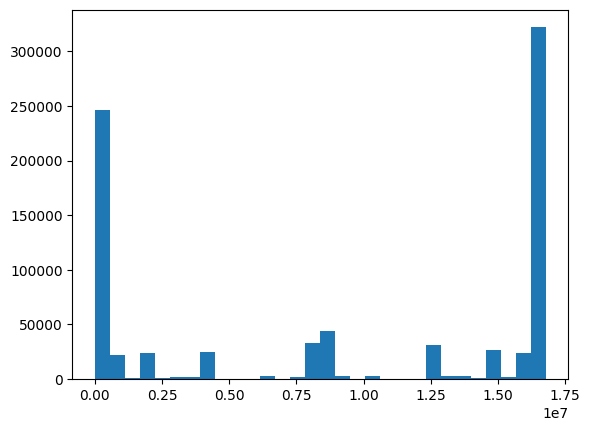

In [13]:
# load image
img = cv2.imread('image.jpg')

# convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply LBP
lbp_image=local_binary_pattern(img, 24, 3, method='default')

# show result
plt.imshow(lbp_image,cmap = 'gray')
plt.axis('off')
plt.show()

# plot histogram of LBPs
plt.hist(lbp_image.ravel(), bins=30)
plt.show()

**As I mentioned in PreReport the Uniform pattern has 59 patterns but the defult mode has 256 ones (8 bits binary number).**

# Gabor

**In this section I applied Gabor filter on image with different theta. Each Gabor filter extracts features in its orientation based on theta.**

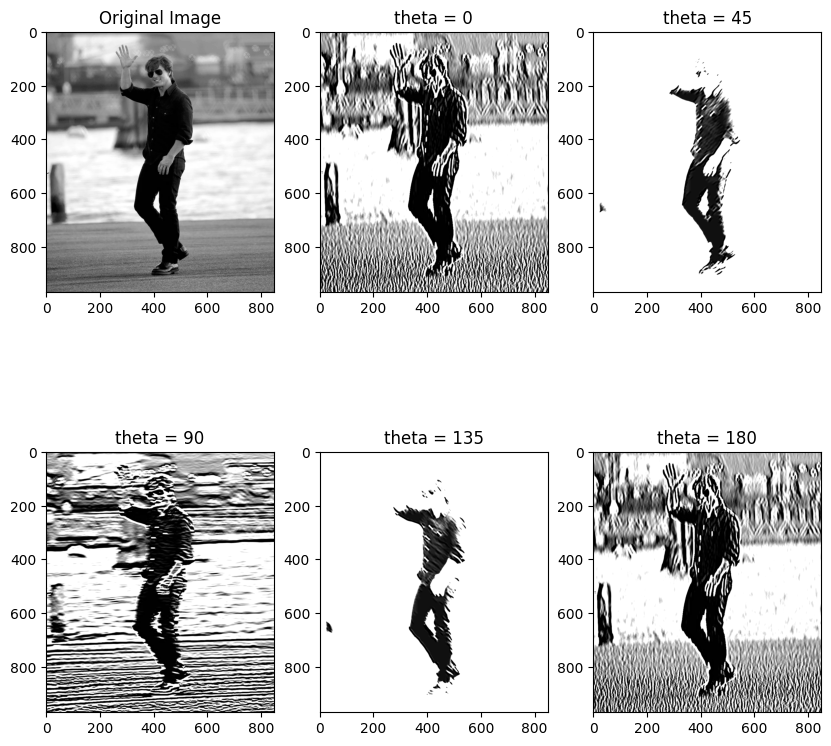

(0.0, 1.0, 0.0, 1.0)

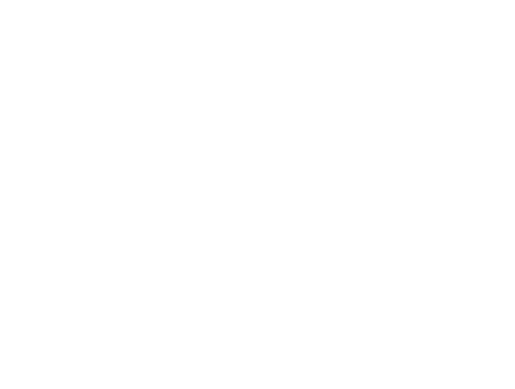

In [25]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,theta in enumerate([0, 45, 90, 135, 180]):
    theta = theta / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = 10.0, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1+1)
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'theta = {int(theta/np.pi * 180)}')
plt.subplot(2,3,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image')
plt.show()
plt.axis('off')

## sigma

**In this section I applied Gabor filter on image with different sigma(std of gaussian).**

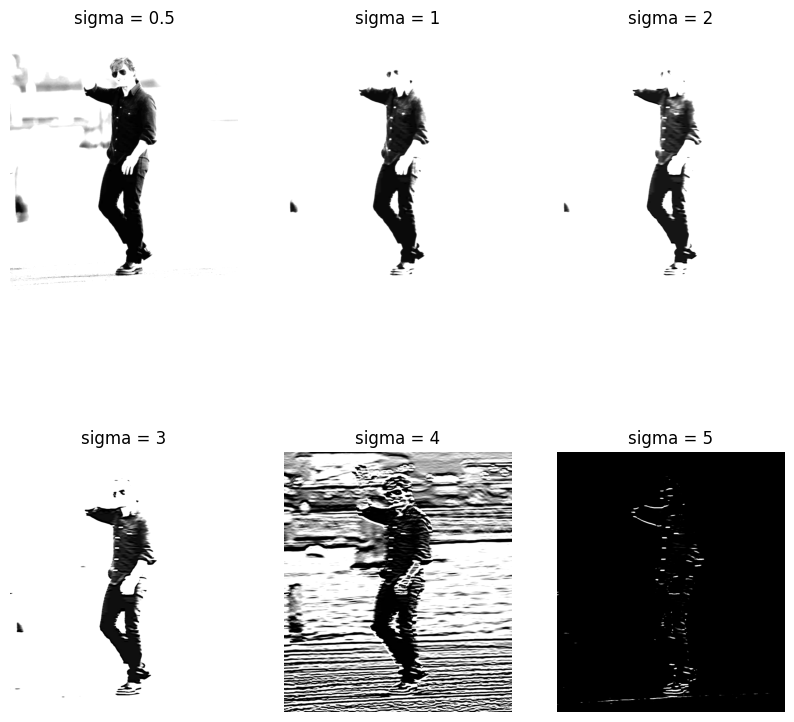

In [26]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,sigma in enumerate([0.5, 1, 2, 3, 4, 5]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = sigma, theta = theta, lambd = 10.0, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'sigma = {sigma}')

## lambda

**In this section I applied Gabor filter on image with different Lambda. Each Gabor filter extracts features in different frequencies based on lambda.**

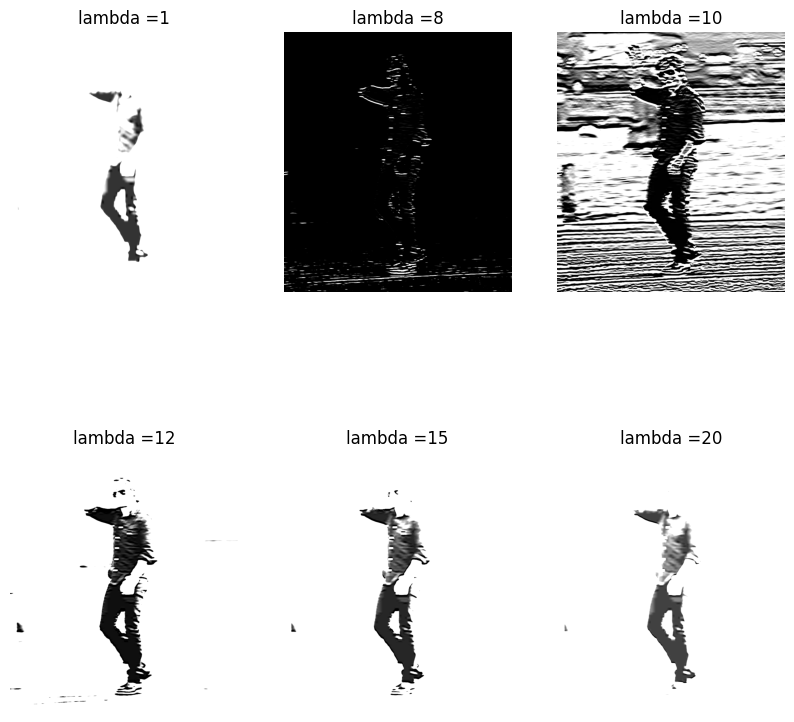

In [27]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,lambd in enumerate([1, 8, 10, 12, 15, 20]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = lambd, gamma = 0.5, psi = 0)
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'lambda ={lambd}')

## gamma

**In this section I applied Gabor filter on image with different gamma.**

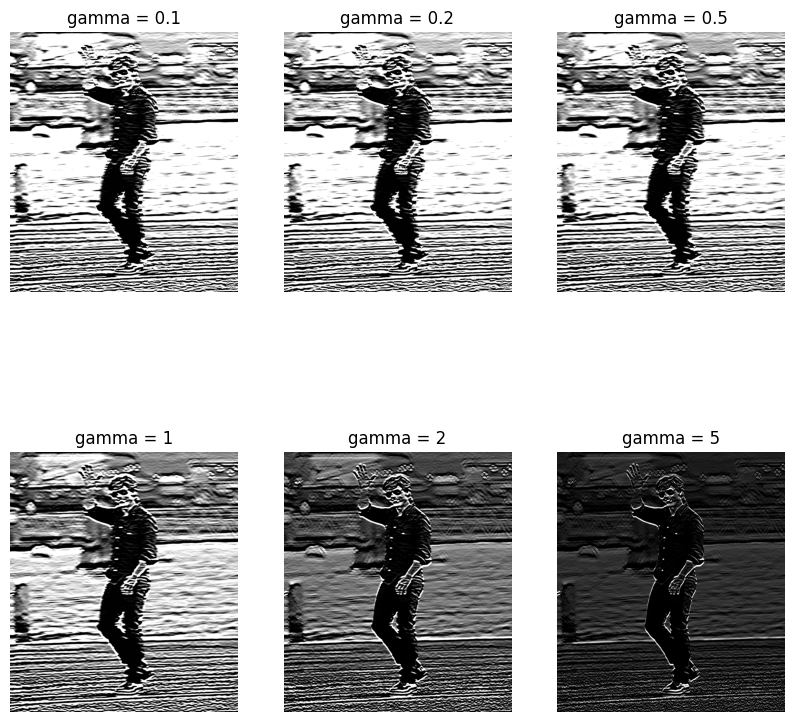

In [28]:
fig, ax = plt.subplots(2,3 , figsize =(10,10))
for i,gamma in enumerate([0.1, 0.2, 0.5, 1, 2, 5]):
    theta = 90 / 180.0 * np.pi
    kernel = cv2.getGaborKernel((15,15), sigma = 4, theta = theta, lambd = 10.0, gamma = gamma, psi = 0)
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(cv2.filter2D(src=img, ddepth = -1, kernel=kernel),cmap='gray')
    plt.title(f'gamma = {gamma}')

## HOG

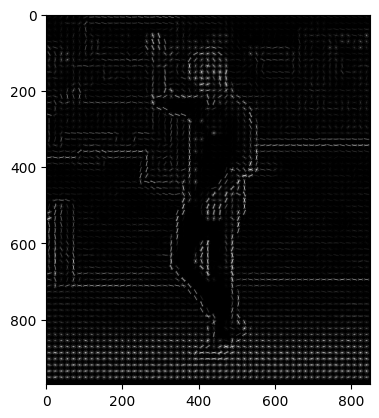

In [30]:
# apply HOG
fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)


hog_img_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 10))

plt.imshow(hog_img_rescaled,cmap = 'gray')
plt.show()

Disgust Dataset Shape: (47, 19584)
Happy Dataset Shape: (85, 19584)


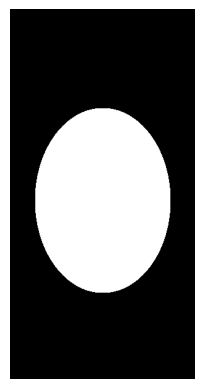

In [35]:
# create a mask
rows = 600
cols = 300
Mask=np.zeros((rows,cols))
for i in range(rows):
    for j in range(cols):
        if (((i-310)**2)/(150**2)) + (((j-150)**2)/(110**2)) < 1:
            Mask[i,j]=1
        
plt.axis('off')
plt.imshow(Mask,cmap='gray')

# load dataset
path = 'disgust'
disgust = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)*Mask
    fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)
    disgust.append(fd)

disgust = np.array(disgust)

# load dataset
path = 'happy'
happy = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)*Mask
    fd, hog_img = hog(img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True)
    happy.append(fd)

happy = np.array(happy)
print('Disgust Dataset Shape:',disgust.shape)
print('Happy Dataset Shape:',happy.shape)

In [34]:
# train test split
disgust_train, disgust_test = train_test_split(disgust, train_size =35, random_state=42)
happy_train, happy_test = train_test_split(happy, train_size =65, random_state=42)

print('Disgust Train Shape:',disgust_train.shape)
print('Disgust Test Shape',disgust_test.shape)
print('Happy Train Shape:',happy_train.shape)
print('Happy Test Shape:', happy_test.shape)

Disgust Train Shape: (35, 19584)
Disgust Test Shape (12, 19584)
Happy Train Shape: (65, 19584)
Happy Test Shape: (20, 19584)


In [38]:
# create whole dataset to feed to model
X_train = np.append(disgust_train,happy_train, axis=0)
X_test = np.append(disgust_test,happy_test, axis=0)

# create train label
y_train = np.append(
    np.ones((disgust_train.shape[0], 1)),
    np.zeros((happy_train.shape[0], 1)), axis=0)

# create test label
y_test = np.append(
    np.ones((disgust_test.shape[0], 1)),
    np.zeros((happy_test.shape[0], 1)), axis=0)

print('X-Train Shape:', X_train.shape)
print('y-Train Shape:', y_train.shape)
print('X-Test Shape:', X_test.shape)
print('y-Train Shape:', y_test.shape)

X-Train Shape: (100, 19584)
y-Train Shape: (100, 1)
X-Test Shape: (32, 19584)
y-Train Shape: (32, 1)


In [39]:
# use Grid search to set hyperparameters
param_grid = [
  
  {'C': [0.0001, 0.001 , 0.01 , 0.1 , 1 , 10 , 100, 1000], 'gamma': [1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2 ,1,10], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.2s
[CV 5/5] END .C=0.0001, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .C=0.0001, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 1/5] END .C=0.0001, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .C=0.0001, gamma=1e-08, kernel=rbf

[CV 2/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END ..C=0.01, gamma=0.0001, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 5/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.2s
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END .......C=0.01, 

[CV 4/5] END .....C=10, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-12, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-10, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 2/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 3/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 4/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 5/5] END .....C=10, gamma=1e-08, kernel=rbf;, score=0.650 total time=   0.1s
[CV 1/5] END .....C=10, gamm

[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.2s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.2s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.2s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.3s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.650 total time=   0.2s
[CV 1/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 2/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.650 total time=   0.2s
[CV 3/5] END ......C=1000, g

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [1e-12, 1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1,
                                    10],
                          'kernel': ['rbf']}],
             verbose=3)

In [42]:
# print best result
print('Best Parameters:', grid.best_params_)
print('Best Score:', grid.best_score_.round(2))

# select best model
clf = grid.best_estimator_

# prediction
y_pred = clf.predict(X_test)

# calculate model accuracy on testset
acc = accuracy_score(y_pred, y_test)

# print Accuaracy on testset
print('Accuracy:', acc)

# print confusion matrix
print(confusion_matrix(y_pred, y_test))

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.98
Accuracy: 1.0
[[20  0]
 [ 0 12]]
